In [27]:
#basic imports
import os.path
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

#more specific imports
from pytrends.request import TrendReq

In [1]:
search_word='tesla'
pytrends = TrendReq(hl='en-US', tz=0)
kw_list = [search_word]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
res = pytrends.get_historical_interest(kw_list, year_start=2018, month_start=12, day_start=30, hour_start=0, year_end=2021, month_end=3, day_end=6, hour_end=0, cat=0, geo='', gprop='', sleep=0)

/Users/Sam/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [6]:
file_path = Path("../data/GoogleTrend_"+search_word+"_hourly.pickle")
print(file_path)
if not os.path.isfile(file_path): #I don't want to save the data again if it's already saved
    pickle.dump(res, open(file_path,"wb"))

There is a zone of the data where there is missing data, both in the form of zeros and in the form of missing rows. We can visualize this below:

date
2018-12-31 06:00:00    0
2018-12-31 07:00:00    0
2018-12-31 08:00:00    0
2018-12-31 09:00:00    0
2018-12-31 10:00:00    0
                      ..
2020-03-17 11:00:00    0
2020-03-17 12:00:00    0
2020-03-17 13:00:00    0
2020-03-17 14:00:00    0
2020-03-17 15:00:00    0
Name: tesla, Length: 267, dtype: int64

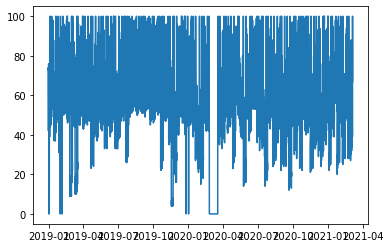

In [7]:
display(res[search_word][res[search_word]==0])

plt.plot(res[search_word])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches [%]')
plt.title("'"+search_word+"' hourly searches relative to weekly maximum")
plt.show()

length of data:  18904


date
2018-12-31 06:00:00    0
2018-12-31 07:00:00    0
2018-12-31 08:00:00    0
2018-12-31 09:00:00    0
2018-12-31 10:00:00    0
2018-12-31 11:00:00    0
2018-12-31 12:00:00    0
2018-12-31 13:00:00    0
2018-12-31 14:00:00    0
2018-12-31 15:00:00    0
2018-12-31 16:00:00    0
2018-12-31 17:00:00    0
2018-12-31 18:00:00    0
2018-12-31 19:00:00    0
2018-12-31 20:00:00    0
2018-12-31 21:00:00    0
2018-12-31 22:00:00    0
2018-12-31 23:00:00    0
2019-01-01 00:00:00    0
2019-01-01 01:00:00    0
2019-01-01 02:00:00    0
2019-01-01 03:00:00    0
2019-01-01 04:00:00    0
2019-01-01 05:00:00    0
2019-01-01 06:00:00    0
2019-01-01 07:00:00    0
2019-01-01 08:00:00    0
2019-01-01 09:00:00    0
2019-01-01 10:00:00    0
2019-01-01 11:00:00    0
2019-01-01 12:00:00    0
2019-01-01 13:00:00    0
2019-01-01 14:00:00    0
2019-01-30 07:00:00    0
2019-01-30 08:00:00    0
2019-01-30 09:00:00    0
2019-02-03 15:00:00    0
2019-02-03 16:00:00    0
2019-02-03 17:00:00    0
2019-02-03 18:00:00 

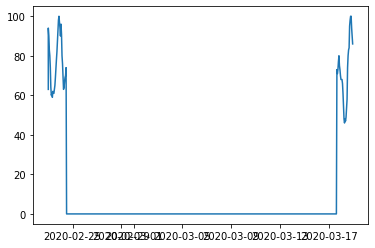

In [8]:
print("length of data: ", len(res))
zero_rows = res[search_word][res[search_word] == 0]
with pd.option_context('display.max_rows', None):
    display(zero_rows)
    
plt.plot(res[search_word]['2020-02-23':'2020-03-18'])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches [%]')
plt.title("'"+search_word+"' hourly searches problematic area")
plt.show()

There seems to be a problem between febrary and march 2020. There's a bunch of zeros... After calculation, there also seems to be missing data here, about 500 missing data points..

In [80]:
pytrends = TrendReq(hl='en-US', tz=0)
kw_list = [search_word]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
res2 = pytrends.interest_over_time()

            tsla isPartial
date                      
2021-02-14    29     False
2021-02-21    59     False
2021-02-28    48     False
2021-03-07    61     False
2021-03-14    37      True


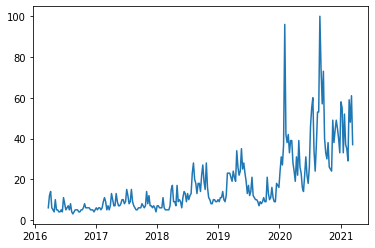

In [81]:
print(res2.tail())

plt.plot(res2[search_word])
plt.xlabel('date')
plt.ylabel('relative searches [%]')
plt.title("'"+search_word+"' weekly searches relative to maximum")
plt.show()

In [82]:
file_path = Path("../data/GoogleTrend_"+search_word+"_weekly.pickle")
print(file_path)
if not os.path.isfile(file_path):
    pickle.dump(res2, open(file_path,"wb"))

date
2020-02-23 00:00:00     63
2020-02-23 01:00:00     60
2020-02-23 02:00:00     55
2020-02-23 03:00:00     54
2020-02-23 04:00:00     49
2020-02-23 05:00:00     43
2020-02-23 06:00:00     40
2020-02-23 07:00:00     41
2020-02-23 08:00:00     39
2020-02-23 09:00:00     41
2020-02-23 10:00:00     41
2020-02-23 11:00:00     41
2020-02-23 12:00:00     42
2020-02-23 13:00:00     44
2020-02-23 14:00:00     46
2020-02-23 15:00:00     50
2020-02-23 16:00:00     52
2020-02-23 17:00:00     55
2020-02-23 18:00:00     58
2020-02-23 19:00:00     62
2020-02-23 20:00:00     66
2020-02-23 21:00:00     67
2020-02-23 22:00:00     65
2020-02-23 23:00:00     63
2020-02-24 00:00:00     60
2020-02-24 01:00:00     64
2020-02-24 02:00:00     61
2020-02-24 03:00:00     53
2020-02-24 04:00:00     51
2020-02-24 05:00:00     46
2020-02-24 06:00:00     42
2020-02-24 07:00:00     43
2020-02-24 08:00:00     45
2020-02-24 09:00:00     46
2020-02-24 10:00:00     47
2020-02-24 11:00:00     49
2020-02-24 12:00:00    

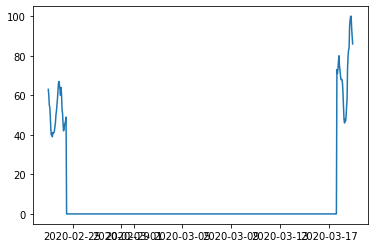

In [54]:
with pd.option_context('display.max_rows', None):
    display(res[search_word]['2020-02-23':'2020-03-18'])
plt.plot(res[search_word]['2020-02-23':'2020-03-18'])

After looking closer at the problematic zone, there is indeed 3 weeks of missing data, between the 25th of februray and the 16th of March... and then before and after the missing data, there's besically a half day of zero values...
There are 2 possibilites:

1. There's a problem with pytrends when trying to retrieve this period
2. There's a problem on the google database side, like missing data.

It is interesting that 2020 is a leap year, and February 29th falls right in this period... So my guess is that either pytrends or the database have/had some trouble managing this.
The other thing of note is that that period is when Covid-19 started to takeoff in the US, so maybe that would be related too ? but I think it's more likely to be related to the leap year

In [59]:
missing = pytrends.get_historical_interest(kw_list, year_start=2020, month_start=3, day_start=2, hour_start=0, year_end=2020, month_end=3, day_end=10, hour_end=0, cat=0, geo='', gprop='', sleep=0)

In [60]:
print(missing)

Empty DataFrame
Columns: []
Index: []


I ended up deciding that I was going to only use the weekly data and not the 

In [13]:
pytrends = TrendReq(hl='en-US', tz=0)
kw_list = [search_word]
pytrends.build_payload(kw_list, cat=0, timeframe='2020-02-24 2020-03-17', geo='', gprop='')
corr = pytrends.interest_over_time()

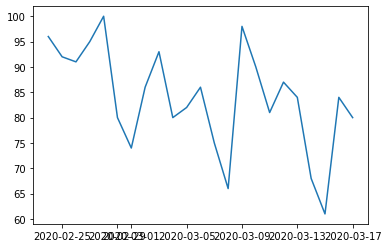

In [14]:
plt.plot(corr[search_word])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches [%]')
plt.title("'"+search_word+"' daily searches relative to problematic area")
plt.show()

In [15]:
print(corr[search_word].head())

date
2020-02-24     96
2020-02-25     92
2020-02-26     91
2020-02-27     95
2020-02-28    100
Name: tesla, dtype: int64


In [16]:
file_path = Path("../data/GoogleTrend_"+search_word+"_daily.pickle")
print(file_path)
if not os.path.isfile(file_path):
    pickle.dump(corr, open(file_path,"wb"))

# Rinse and repeat with other trend search terms
## 'tsla' search term

In [19]:
search_word = 'tsla'
pytrends = TrendReq(hl='en-US', tz=0)
kw_list = [search_word] #This might target investors a bit more
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
res = pytrends.get_historical_interest(kw_list, year_start=2018, month_start=12, day_start=30, hour_start=0, year_end=2021, month_end=3, day_end=6, hour_end=0, cat=0, geo='', gprop='', sleep=0)

In [26]:
file_path = Path("../data/GoogleTrend_"+search_word+"_hourly.pickle")
#I don't want to save the data again if it's already saved
print(file_path)
if not os.path.isfile(file_path):
    pickle.dump(res, open(file_path,"wb"))

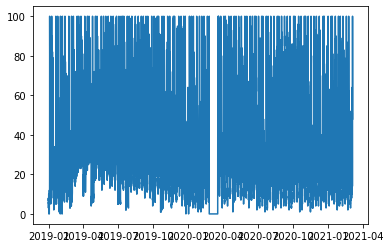

In [25]:
plt.plot(res[search_word])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches')
plt.title("'" +search_word+"' hourly searches relative to each week")
plt.show()

Again, there seems to be a problem with google trends around the same periode with this key word

date
2018-12-31 06:00:00    0
2018-12-31 07:00:00    0
2018-12-31 08:00:00    0
2018-12-31 09:00:00    0
2018-12-31 10:00:00    0
                      ..
2020-03-17 11:00:00    0
2020-03-17 12:00:00    0
2020-03-17 13:00:00    0
2020-03-17 14:00:00    0
2020-03-17 15:00:00    0
Name: tsla, Length: 267, dtype: int64

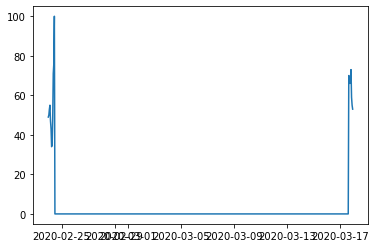

In [24]:
display(res[search_word][res[search_word]==0])

plt.plot(res[search_word]['2020-02-24':'2020-03-17'])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches')
plt.title("'"+search_word"' hourly searches problematic region")
plt.show()

We'll to the same workaround as for the other one: use the daily value for that period instead of the hourly. So we nee to download the daily value for that period, as well as the weekly values for the entire interval

### Getting weekly values
each week is a percentage with respect to the week with the maximum amount of searches on the whole time period

In [28]:
#weekly value
pytrends = TrendReq(hl='en-US', tz=0)
kw_list = [search_word]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
res2 = pytrends.interest_over_time()

            tsla isPartial
date                      
2021-02-14    30     False
2021-02-21    59     False
2021-02-28    51     False
2021-03-07    61     False
2021-03-14    40      True


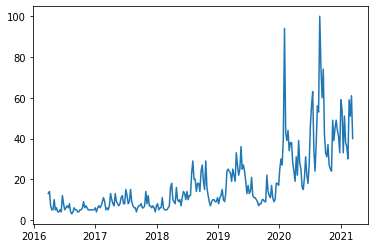

In [30]:
print(res2.tail())

plt.plot(res2[search_word])
plt.xlabel('date')
plt.ylabel('relative searches [%]')
plt.title("'"+search_word+"' weekly relative searches")
plt.show()

In [33]:
file_path = Path("../data/GoogleTrend_"+search_word+"_weekly.pickle")
print(file_path)
if not os.path.isfile(file_path):
    pickle.dump(res2, open(file_path,"wb"))

### Getting daily values
each day is a percentage relative to the day with the maximum searches of the time period

In [36]:
#daily values
pytrends.build_payload(kw_list, cat=0, timeframe='2020-02-24 2020-03-17', geo='', gprop='')
corr = pytrends.interest_over_time()

date
2020-02-24     83
2020-02-25     84
2020-02-26     75
2020-02-27     90
2020-02-28    100
Name: tsla, dtype: int64


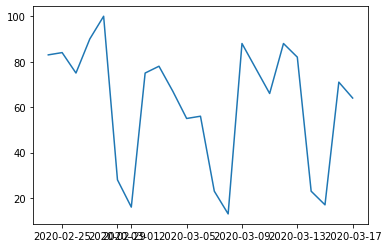

In [37]:
# Want to verify it's indeed daily
print(corr[search_word].head())
plt.plot(corr[search_word])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches')
plt.title("'"+search_word+"' daily searches relative to problematic area")
plt.show()

In [38]:
file_path = Path("../data/GoogleTrend_"+search_word+"_daily.pickle")
print(file_path)
if not os.path.isfile(file_path):
    pickle.dump(corr, open(file_path,"wb"))

## 'Musk' search term

In [39]:
search_word = 'musk'
pytrends = TrendReq(hl='en-US', tz=0)
kw_list = [search_word] #Note google trends is not case sensitive, I checked
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
res = pytrends.get_historical_interest(kw_list, year_start=2018, month_start=12, day_start=30, hour_start=0, year_end=2021, month_end=3, day_end=6, hour_end=0, cat=0, geo='', gprop='', sleep=0)

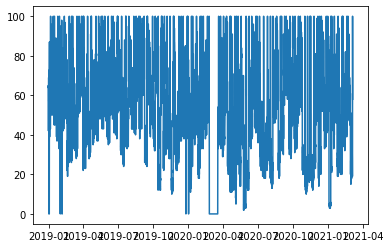

In [40]:
plt.plot(res[search_word])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches')
plt.title("'"+search_word+"' hourly searches relative weekly maximum")
plt.show()

In [41]:
file_path = Path("../data/GoogleTrend_"+search_word+"_hourly.pickle")
#I don't want to save the data again if it's already saved
print(file_path)
if not os.path.isfile(file_path):
    pickle.dump(res, open(file_path,"wb"))

Let's just check to be 100% sure that the problematic period is still the same one:

date
2018-12-31 06:00:00    0
2018-12-31 07:00:00    0
2018-12-31 08:00:00    0
2018-12-31 09:00:00    0
2018-12-31 10:00:00    0
                      ..
2020-03-17 11:00:00    0
2020-03-17 12:00:00    0
2020-03-17 13:00:00    0
2020-03-17 14:00:00    0
2020-03-17 15:00:00    0
Name: musk, Length: 267, dtype: int64

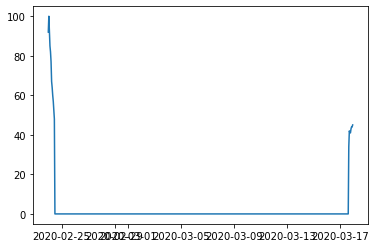

In [43]:
display(res[search_word][res[search_word]==0])

plt.plot(res[search_word]['2020-02-24':'2020-03-17'])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches')
plt.title("'"+search_word+"' hourly searches in problematic area")
plt.show()

yup, same same

### Weekly searches

In [63]:
#weekly value
pytrends = TrendReq(hl='en-US', tz=0)
kw_list = [search_word]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
res2 = pytrends.interest_over_time()

            musk isPartial
date                      
2021-02-14    24     False
2021-02-21    24     False
2021-02-28    22     False
2021-03-07    17     False
2021-03-14    15      True


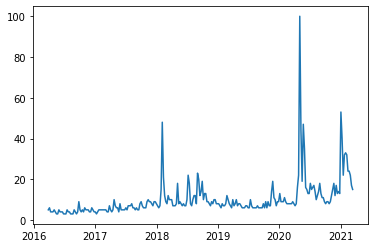

In [64]:
print(res2.tail())

plt.plot(res2[search_word])
plt.xlabel('date')
plt.ylabel('relative searches [%]')
plt.title("'"+serach_word+"' weekly searches relative to maximum")
plt.show()

In [65]:
file_path = Path("../data/GoogleTrend_"+search_word+"_weekly.pickle")
print(file_path)
if not os.path.isfile(file_path):
    pickle.dump(res2, open(file_path,"wb"))

### Daily searches

In [47]:
#daily values
pytrends.build_payload(kw_list, cat=0, timeframe='2020-02-24 2020-03-17', geo='', gprop='')
corr = pytrends.interest_over_time()

date
2020-02-24    79
2020-02-25    65
2020-02-26    64
2020-02-27    57
2020-02-28    71
Name: musk, dtype: int64


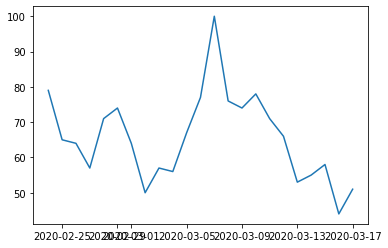

In [49]:
# Want to verify it's indeed daily
print(corr[search_word].head())

plt.plot(corr[search_word])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches')
plt.title("'"+search_word+"' daily searches relative to maximum")
plt.show()

In [50]:
file_path = Path("../data/GoogleTrend_"+search_word+"_daily.pickle")
print(file_path)
if not os.path.isfile(file_path):
    pickle.dump(corr, open(file_path,"wb"))

# Let's also consider the "tesla stock" search term

While our first search term "tesla" would reflect the general sentiment vis-à-vis to Tesla, and the second search term "tsla" would the sentiment of investors, "tesla stock" could capture the inteserst of people new to investing. Obviously all these search terms are similar, so we will need to do some analysis to make sure they are too colinear to be usefull.

In [51]:
search_word = 'tesla stock'
pytrends = TrendReq(hl='en-US', tz=0)
kw_list = [search_word] #Note google trends is not case sensitive, I checked
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
res = pytrends.get_historical_interest(kw_list, year_start=2018, month_start=12, day_start=30, hour_start=0, year_end=2021, month_end=3, day_end=6, hour_end=0, cat=0, geo='', gprop='', sleep=0)

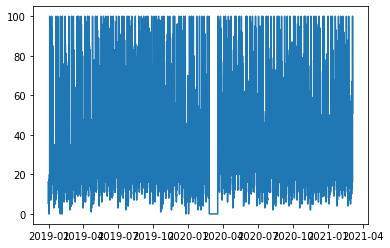

In [52]:
plt.plot(res[search_word])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches [%]')
plt.title("'"+search_word+"' hourly searches relative to weekly maximum")
plt.show()

In [53]:
file_path = Path("../data/GoogleTrend_"+search_word.replace(" ","_")+"_hourly.pickle")
print(file_path)
#I don't want to save the data again if it's already saved
if not os.path.isfile(file_path):
    pickle.dump(res, open(file_path,"wb"))

date
2018-12-31 06:00:00    0
2018-12-31 07:00:00    0
2018-12-31 08:00:00    0
2018-12-31 09:00:00    0
2018-12-31 10:00:00    0
                      ..
2020-03-17 11:00:00    0
2020-03-17 12:00:00    0
2020-03-17 13:00:00    0
2020-03-17 14:00:00    0
2020-03-17 15:00:00    0
Name: tesla stock, Length: 267, dtype: int64

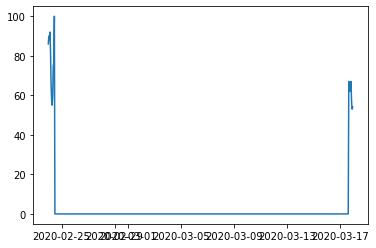

In [55]:
display(res[search_word][res[search_word]==0])

plt.plot(res[search_word]['2020-02-24':'2020-03-17'])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches [%]')
plt.title("'"+search_word+"' hourly searches problematic area")
plt.show()

### Weekly searches

In [56]:
#weekly value
pytrends = TrendReq(hl='en-US', tz=0)
kw_list = [search_word]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
res2 = pytrends.interest_over_time()

            tesla stock isPartial
date                             
2021-02-14           34     False
2021-02-21           58     False
2021-02-28           49     False
2021-03-07           58     False
2021-03-14           40      True


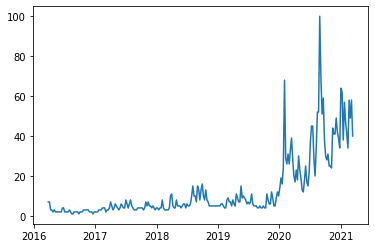

In [58]:
print(res2.tail())

plt.plot(res2[search_word])
plt.xlabel('date')
plt.ylabel('relative searches [%]')
plt.title("'"+search_word+"' weekly searches relative to maximum")
plt.show()

In [59]:
file_path = Path("../data/GoogleTrend_"+search_word.replace(" ","_")+"_weekly.pickle")
print(file_path)
if not os.path.isfile(file_path):
    pickle.dump(res2, open(file_path,"wb"))

### Daily searches

In [60]:
#daily values
pytrends.build_payload(kw_list, cat=0, timeframe='2020-02-24 2020-03-17', geo='', gprop='')
corr = pytrends.interest_over_time()

date
2020-02-24     69
2020-02-25     76
2020-02-26     60
2020-02-27     79
2020-02-28    100
Name: tesla stock, dtype: int64


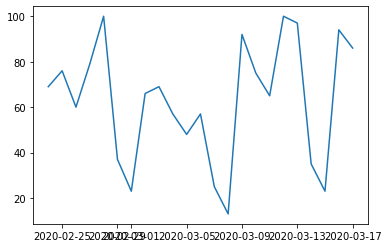

In [61]:
# Want to verify it's indeed daily
print(corr[search_word].head())

plt.plot(corr[search_word])
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('relative searches [%]')
plt.title("'"+search_word+"' daily searches relative to maximum")
plt.show()

In [62]:
file_path = Path("../data/GoogleTrend_"+search_word.replace(" ","_")+"_daily.pickle")
print(file_path)
if not os.path.isfile(file_path):
    pickle.dump(corr, open(file_path,"wb"))